Import Dependencies

In [10]:
import warnings

warnings.filterwarnings('ignore')

In [11]:
import cv2
import numpy as np
import os 
from matplotlib import pyplot as plt
import time 
import mediapipe as mp

media pipe holistics

In [12]:
mp_holistic = mp.solutions.holistic  # media pipe holistic model 
mp_drawing = mp.solutions.drawing_utils # media pipe drawing utilities

In [13]:
def mediapipe_detection(image, model):
    # Convert the image from RGB to BGR for OpenCV processing
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # Improve performance by making the image array non-writeable
    image.flags.writeable = False

    # Process the image with the MediaPipe model
    results = model.process(image)

    # Make the image array writeable again
    image.flags.writeable = True

    # Convert the image back to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Return the processed image and the results
    return image, results


In [33]:
# Define custom drawing styles
face_landmark_style = mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1)
face_connection_style = mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1)

pose_landmark_style = mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4)
pose_connection_style = mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2)

left_hand_landmark_style = mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4)
left_hand_connection_style = mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2)

right_hand_landmark_style = mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4)
right_hand_connection_style = mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)

In [38]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,landmark_drawing_spec=face_landmark_style,connection_drawing_spec=face_connection_style) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,landmark_drawing_spec=pose_landmark_style,connection_drawing_spec=pose_connection_style) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,landmark_drawing_spec=left_hand_landmark_style,connection_drawing_spec=left_hand_connection_style) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,landmark_drawing_spec=right_hand_landmark_style,connection_drawing_spec=right_hand_connection_style) # Draw right hand connections


In [45]:
import cv2

# Open the default camera (usually the webcam)
cap = cv2.VideoCapture(0)

# Check if the camera opened successfully
if not cap.isOpened():
    print("Error: Could not open video stream or file")
    exit()

with mp_holistic.Holistic(min_detection_confidence= 0.5 , min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()  # Read a frame from the camera


        if not ret: 
            print("Error: Failed to capture image")
            break
        

        image , results = mediapipe_detection(frame, holistic)
        print(results)

        draw_landmarks(image,results)
        
        cv2.imshow('CV2 Feed', image)  # Display the frame in a window named 'CV2 Feed'
        
        # Check if 'q' key is pressed to break the loop
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()  # Release the camera
    cv2.destroyAllWindows()  # Close all OpenCV windows



libEGL warning: MESA-LOADER: failed to open radeonsi: /usr/lib/dri/radeonsi_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open radeonsi: /usr/lib/dri/radeonsi_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open radeonsi: /usr/lib/dri/radeonsi_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open radeonsi: /usr/lib/dri/radeonsi_dri.so: 

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [40]:
results

mediapipe.python.solution_base.SolutionOutputs

In [41]:
len(results.face_landmarks.landmark)

468

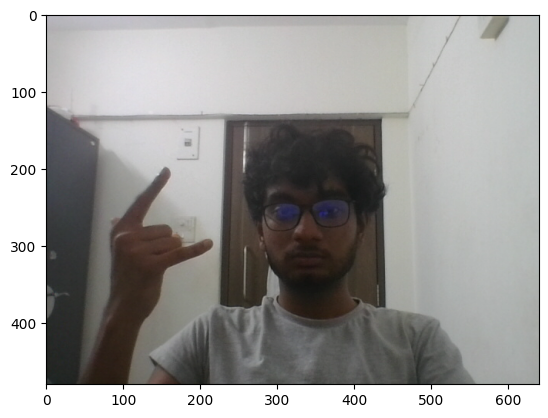

In [42]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [43]:
draw_landmarks(frame, results)

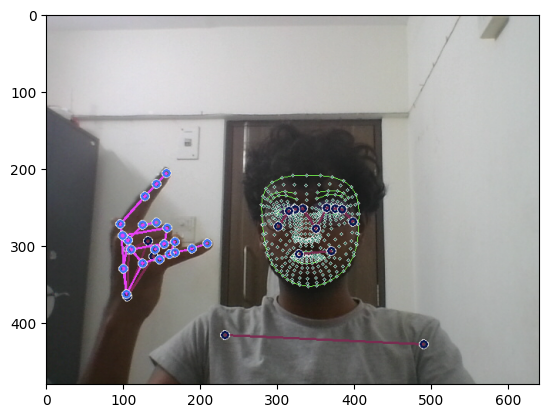

In [44]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))